In [464]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [465]:
class Agent:
    def __init__(self, type, sensitivity, frequency):
        self.type = type
        self.sensitivity = sensitivity
        self.frequency = frequency
        self.purchase_history = []
    
    def decide_to_buy(self, price):
        return random.random() < self.frequency / price ** self.sensitivity

In [466]:
num_agents = 60
agents = []

for _ in range(num_agents // 3):

    # impulsive_sensitivity = np.random.uniform(0.0, 0.51)
    # neutral_sensitivity = np.random.uniform(0.52, 1.5)
    # conservative_sensitivity = np.random.uniform(1.51, 3.0)

    # impulsive_frequency = np.random.uniform(0.7, 1.2)
    # neutral_frequency = np.random.uniform(0.4, 0.7)
    # conservative_frequency = np.random.uniform(0.1, 0.4)

    # agents.append(Agent("Impulsive", impulsive_sensitivity, impulsive_frequency))
    # agents.append(Agent("Neutral", neutral_sensitivity, neutral_frequency))
    # agents.append(Agent("Conservative", conservative_sensitivity, conservative_frequency))

    agents.append(Agent("Impulsive", 0.5, 0.9))
    agents.append(Agent("Neutral", 1, 0.6))
    agents.append(Agent("Conservative", 1.2, 0.4))

In [467]:
def get_price(sales, base_price, m):
    price = base_price + 0.1 * sales
    return price

In [468]:
num_steps = 1000
base_price = 5
price_fluctuation = 0.5
total_purchahses = []
m = 0.0001
prices = []


for step in range(num_steps):
    if len(total_purchahses):
        current_price = get_price(total_purchahses[-1], base_price, m)
    else:
        current_price = base_price + random.uniform(-price_fluctuation, price_fluctuation)
    purchases = 0
    for agent in agents:
        if agent.decide_to_buy(current_price):
            purchases += 1
            agent.purchase_history.append(current_price)
        else:
            agent.purchase_history.append(0)
    total_purchahses.append(purchases)
    prices.append(current_price)

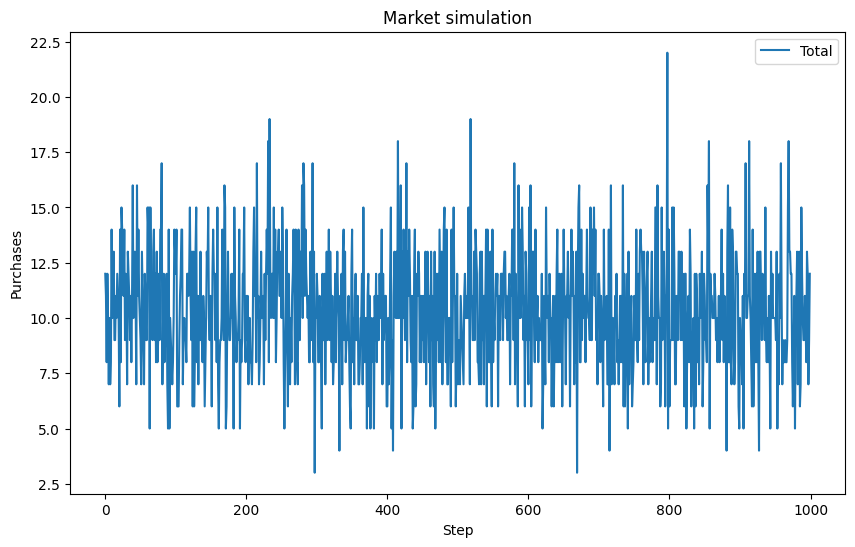

In [469]:
plt.figure(figsize=(10, 6))
plt.plot(total_purchahses, label="Total")
plt.xlabel("Step")
plt.ylabel("Purchases")
plt.title("Market simulation")
plt.legend()
plt.show()

Text(0, 0.5, 'Purchases')

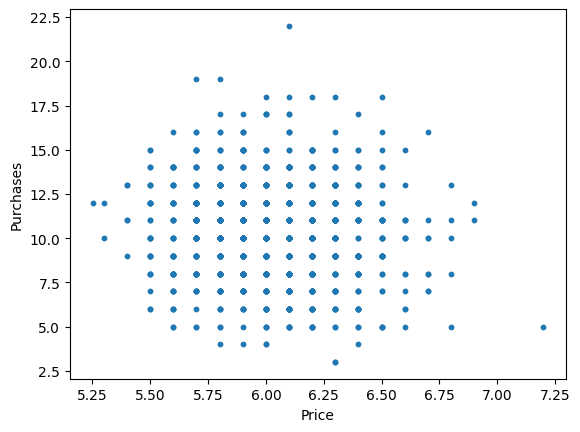

In [470]:
_ = plt.plot(figsize=(10, 6))
plt.scatter(prices, total_purchahses, s = 10)
plt.xlabel("Price")
plt.ylabel("Purchases")

In [471]:
impulsive_agents = [agent.purchase_history for agent in agents if agent.type == "Impulsive"]
impulsive_agents = np.array(impulsive_agents)

neutral_agents = [agent.purchase_history for agent in agents if agent.type == "Neutral"]
neutral_agents = np.array(neutral_agents)

conservative_agents = [agent.purchase_history for agent in agents if agent.type == "Conservative"]
conservative_agents = np.array(conservative_agents)

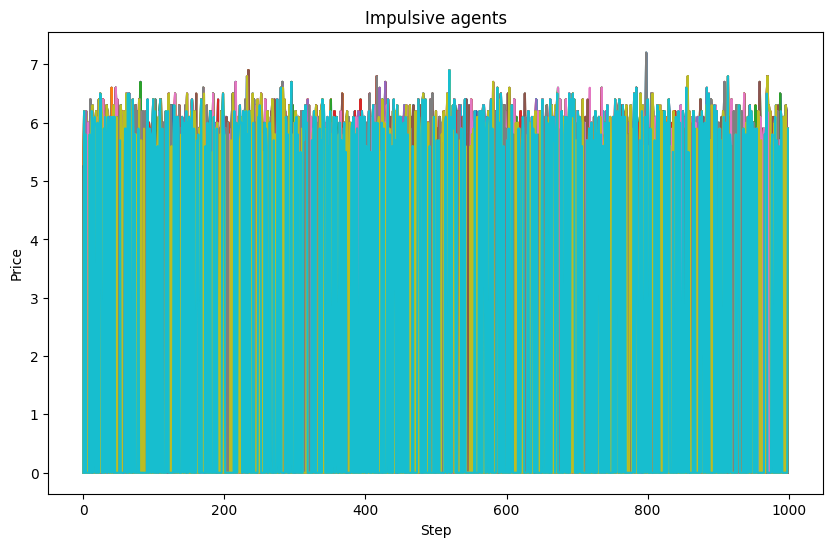

In [472]:
_ = plt.figure(figsize=(10, 6))
plt.plot(impulsive_agents.T)
plt.xlabel("Step")
plt.ylabel("Price")
plt.title("Impulsive agents")
plt.show()

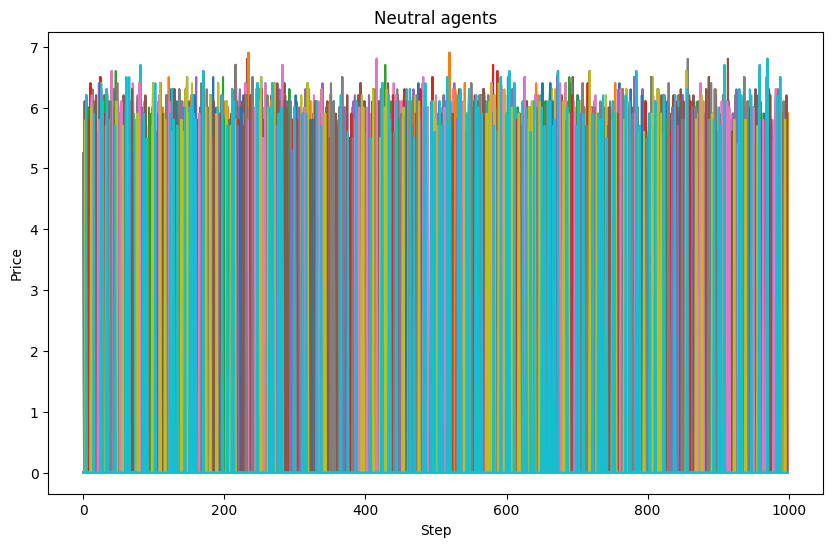

In [473]:
_ = plt.figure(figsize=(10, 6))
plt.plot(neutral_agents.T)
plt.xlabel("Step")
plt.ylabel("Price")
plt.title("Neutral agents")
plt.show()

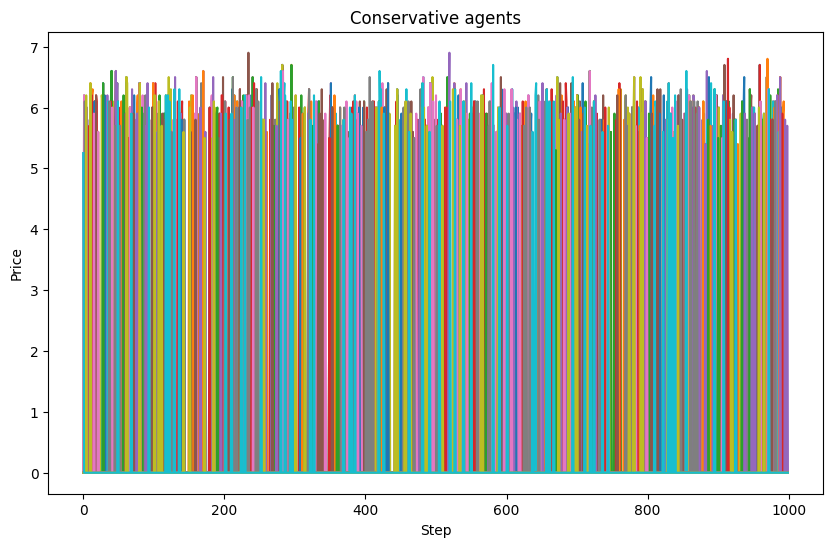

In [474]:
_ = plt.figure(figsize=(10, 6))
plt.plot(conservative_agents.T)
plt.xlabel("Step")
plt.ylabel("Price")
plt.title("Conservative agents")
plt.show()

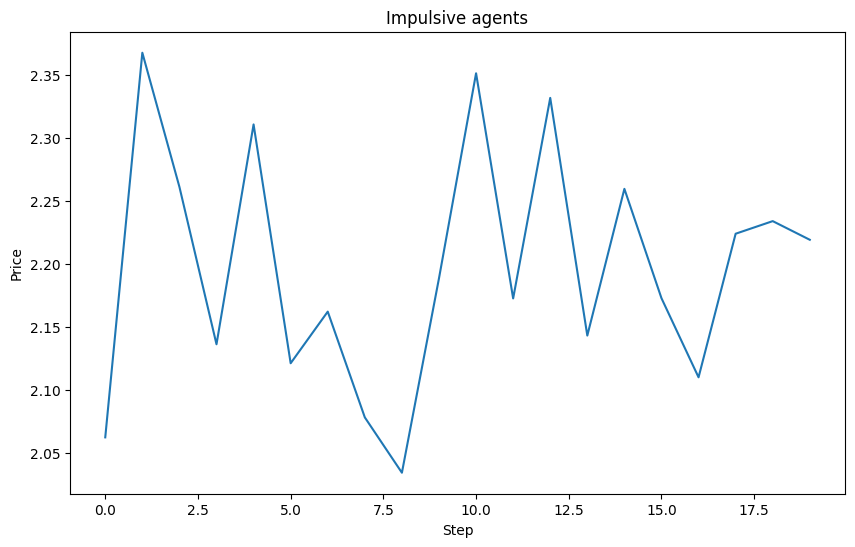

In [475]:
_ = plt.figure(figsize=(10, 6))
plt.plot(np.nanmean(impulsive_agents.T, axis = 0))
plt.xlabel("Step")
plt.ylabel("Price")
plt.title("Impulsive agents")
plt.show()